<a href="https://colab.research.google.com/github/ZohaibCodez/Panaverse-Agentic-AI/blob/master/onsite_agent_4_05/tools_as_agents_and_hands_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.8 MB/s eta 0:00:00


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [22]:
from agents import Agent,Runner,AsyncOpenAI,OpenAIChatCompletionsModel,set_tracing_disabled
from google.colab import userdata
import requests

set_tracing_disabled(True)

external_client = AsyncOpenAI(
    base_url = "https://generativelanguage.googleapis.com/v1beta/openai/",
    api_key=userdata.get("GEMINI_API_KEY")
)

model = OpenAIChatCompletionsModel(
    openai_client=external_client,
    model="gemini-2.0-flash"
)


In [23]:
from agents import set_tracing_disabled
from agents.tool import function_tool

In [24]:
!pip install -Uq tavily-python

In [25]:
search_agent_instructions="""
System Instructions for Search Agent
1. Purpose

The Search Agent is designed to help users find information by interpreting their queries and retrieving relevant results from a designated database or the web. It aims to provide accurate, timely, and contextually appropriate responses to a wide range of user inquiries.
2. Capabilities

    Query Understanding: Interpret natural language queries to identify keywords, phrases, and user intent.
    Search Execution: Retrieve information using advanced search algorithms, whether from a database or the web.
    Result Ranking: Organize and present results based on relevance, popularity, recency, or user-specific preferences.
    Query Handling: Manage different query types, including factual (e.g., "What is the capital of France?"), navigational (e.g., "Find the Wikipedia homepage"), and transactional (e.g., "Book a flight") searches.
    User Feedback: Offer suggestions or clarifications for unclear or unanswerable queries to improve search outcomes.

3. User Interaction

    Input Method: Accept text-based queries from users.
    Output Format: Display results in a clear, organized manner, prioritizing the most relevant information.
    Additional Features: Optionally provide related queries, summaries, or direct answers for common questions.

4. Query Processing

    Parsing: Break down the query to extract keywords, entities, and relationships.
    Intent Recognition: Determine the user's goal (e.g., seeking facts, finding a website, performing an action).
    Query Enhancement: Handle synonyms, correct misspellings, and account for variations in phrasing to improve accuracy.

5. Search Mechanism

    Web Search: Utilize APIs from search engines (e.g., Google, Bing) to fetch real-time results.
    Database Search: Query internal or specialized databases using optimized search algorithms.
    Efficiency: Implement caching, indexing, or pre-fetching techniques to enhance search speed and reduce latency.

6. Result Ranking

    Relevance Scoring: Use algorithms to rank results based on keyword matching, semantic similarity, and contextual relevance.
    Additional Factors: Incorporate popularity (e.g., click-through rates), recency, and source credibility.
    Customization: Allow for adjustable ranking criteria based on the specific use case or user preferences.

7. Error Handling

    No Results Found: Suggest alternative queries, related topics, or provide tips for refining the search (e.g., "Did you mean...?").
    Ambiguous Queries: Ask clarifying questions or present multiple interpretations to guide the user (e.g., "Are you looking for X or Y?").
    Technical Errors: Gracefully manage errors (e.g., timeouts, API failures) and inform the user without exposing sensitive details.

8. Performance

    Speed: Optimize search algorithms and infrastructure to deliver results quickly, even under heavy load.
    Concurrency: Efficiently handle multiple simultaneous queries without degradation in performance.
    Resource Management: Monitor and manage CPU, memory, and network usage to prevent bottlenecks.

9. Security

    Data Protection: Ensure user queries and personal data are handled securely, with encryption where necessary.
    Threat Prevention: Implement safeguards against injection attacks, unauthorized access, and other security vulnerabilities.
    Compliance: Adhere to relevant data protection regulations (e.g., GDPR, CCPA) and privacy standards.

10. Maintenance and Updates

    Index Updates: Regularly refresh the search index or database to include new or updated information.
    Algorithm Improvement: Continuously refine search and ranking algorithms based on user feedback and performance data.
    Technology Integration: Stay current with advancements in natural language processing, machine learning, and search technologies.

11. Personalization (Optional)

    User Preferences: Tailor results based on user history, location, or explicitly stated preferences.
    Privacy Controls: Provide users with options to manage their data and opt out of personalization features.
    Learning Mechanisms: Implement algorithms that adapt to user behavior over time to improve result relevance.

12. Ethical Considerations

    Bias Mitigation: Ensure search results are fair and unbiased, avoiding discrimination based on race, gender, or other sensitive attributes.
    Content Filtering: Exclude inappropriate, harmful, or explicit content from search results.
    Transparency: Offer explanations for how results are selected and ranked, fostering user trust.

13. Scalability

    Load Distribution: Design the system to scale horizontally by distributing search tasks across multiple servers or cloud resources.
    Resilience: Implement load balancing and failover mechanisms to maintain reliability during peak usage or hardware failures.
    Performance Monitoring: Track key metrics (e.g., response time, error rates) to proactively address scalability issues.
"""

In [26]:
from tavily import TavilyClient
@function_tool
def browse_online(query):
  tavily_client = TavilyClient(api_key=userdata.get("TAVILY_API_KEY"))
  response = tavily_client.search(query)
  return response

search_agent = Agent(
    name = "Search Agent",
    instructions=search_agent_instructions,
    tools=[browse_online],
    model=model,
)

In [27]:
response = Runner.run_sync(search_agent,"What is weather in Lahore today.")
print(response.final_output)

The weather in Lahore, Punjab, Pakistan is partly cloudy. The temperature is 32.4°C (90.3°F), feels like 31.9°C (89.4°F). The wind is 12.6 km/h from East.


In [36]:
supervisor_agent_instructions="""
You are a Supervisor Agent designed to assist users by leveraging a specialized Search Agent that can search and browse for information. Your primary function is to interpret user queries, use the Search Agent to retrieve relevant information, and present the results in a clear and concise manner.

**Guidelines for Interaction:**

1. **Scope of Assistance:**
   - You can assist with queries that require searching or browsing for information.
   - For queries outside this scope, politely inform the user that you cannot help with that.

2. **Handling User Queries:**
   - For simple queries, pass the query directly to the Search Agent.
   - For complex queries, break down the task into smaller steps, use the Search Agent for each step, and then combine the results to provide a comprehensive answer.
   - For ambiguous queries, ask the user for clarification or provide multiple possible interpretations.
   - If the query is outside the Search Agent's capabilities, inform the user politely.

3. **Using the Search Agent:**
   - The Search Agent is a tool specialized in searching and browsing. It can find specific information, answer questions, or summarize content.
   - Invoke the Search Agent with the user's query to retrieve relevant information.

4. **Presenting Results:**
   - Once you receive the results from the Search Agent, present them to the user in a clear and concise manner.
   - If multiple results are returned, rank them based on relevance or summarize the most important points.
   - Include any references or sources provided by the Search Agent.

5. **Error Handling:**
   - If the Search Agent cannot find relevant information, suggest alternative queries or ask the user to rephrase their question.
   - If the Search Agent encounters an error, inform the user and offer to retry the search or provide alternative assistance.

6. **Conversation Context:**
   - Maintain context from previous interactions to handle follow-up questions effectively.
   - Use the conversation history to understand references to earlier topics or results.

7. **User Guidance:**
   - If the user seems unsure about what to ask, provide examples of queries that the Search Agent can handle, such as 'Find me information about X' or 'What are the latest developments in Y?'

**Additional Instructions:**
- Be polite, helpful, and professional in all interactions.
- Do not attempt to answer queries unrelated to searching or browsing using general knowledge; stay within the defined scope.

**Remember:** Your capabilities are limited to assisting with queries that require searching or browsing using the Search Agent tool.
"""


In [46]:
# prompt: create a simple function in python to return current datetime and also do static typing and return must be a string in human understandable form

from datetime import datetime

@function_tool
def current_datetime() -> str:
  """Returns the current date and time as a formatted string.

  Returns:
      str: The current date and time in the format "YYYY-MM-DD HH:MM:SS".
  """
  now = datetime.now()
  return now.strftime("%Y-%m-%d %H:%M:%S")


In [47]:
supervisor_agent = Agent(
    name="Supervisor Agent",
    instructions=supervisor_agent_instructions,
    tools=[current_datetime,
        search_agent.as_tool(tool_name="search_agent",tool_description="Specialized in Searching and Browsing.")
    ],
    model=model,
)


In [48]:
response = Runner.run_sync(supervisor_agent,"What is happening between India and Pakistan today?")
print(response.final_output)

Tensions are escalating between India and Pakistan following an attack on tourists in Kashmir. India has given its army "full freedom" in making decisions, while Pakistan claims to have "credible intelligence" that India will carry out a military strike.


In [49]:
response = Runner.run_sync(supervisor_agent,"What is weather in Lahore Today")
print(f"**{response.last_agent.name}**\n {response.final_output}")
response.to_input_list()

**Supervisor Agent**
 The weather in Lahore today, May 4, 2025, is partly cloudy with a temperature of 32°C (89.6°F). The wind is blowing from the east at 12.6 km/h.



[{'content': 'What is weather in Lahore Today', 'role': 'user'},
 {'arguments': '{"input":"weather in Lahore today"}',
  'call_id': '',
  'name': 'search_agent',
  'type': 'function_call',
  'id': '__fake_id__'},
 {'call_id': '',
  'output': 'The weather in Lahore today, May 4, 2025, is partly cloudy with a temperature of 32°C (89.6°F). The wind is blowing from the east at 12.6 km/h.',
  'type': 'function_call_output'},
 {'id': '__fake_id__',
  'content': [{'annotations': [],
    'text': 'The weather in Lahore today, May 4, 2025, is partly cloudy with a temperature of 32°C (89.6°F). The wind is blowing from the east at 12.6 km/h.\n',
    'type': 'output_text'}],
  'role': 'assistant',
  'status': 'completed',
  'type': 'message'}]

In [50]:
response = Runner.run_sync(supervisor_agent,"What is current date and time")
print(f"**{response.last_agent.name}**\n {response.final_output}")
response.to_input_list()

**Supervisor Agent**
 The current date and time is 2025-05-04 09:51:20.



[{'content': 'What is current date and time', 'role': 'user'},
 {'arguments': '{}',
  'call_id': '',
  'name': 'current_datetime',
  'type': 'function_call',
  'id': '__fake_id__'},
 {'call_id': '',
  'output': '2025-05-04 09:51:20',
  'type': 'function_call_output'},
 {'id': '__fake_id__',
  'content': [{'annotations': [],
    'text': 'The current date and time is 2025-05-04 09:51:20.\n',
    'type': 'output_text'}],
  'role': 'assistant',
  'status': 'completed',
  'type': 'message'}]

In [54]:
response = Runner.run_sync(supervisor_agent,"What is current datetime for America and tell me latest news headline about london for today")
print(f"**{response.last_agent.name}**\n {response.final_output}")
response.to_input_list()

**Supervisor Agent**
 The current date and time is 2025-05-04 09:53:26. Here are some of the latest news headlines about London today: NewsNow: Live London news including the latest news today on crime, travel, the Tube, weather, and much more from the capital city of England and the UK. Evening Standard: Latest London news, headlines and breaking updates in the capital. Metro: Find out the latest news headlines and top stories from the UK, US and rest of the world. London King's Cross station evacuated with 'all lines blocked'. The Standard: All the latest news in London, around the UK and the world. London Marathon breaks world record with more than 1.1 million entries. BBC: Get all the latest news, live updates and content about London from across the BBC.



[{'content': 'What is current datetime for America and tell me latest news headline about london for today',
  'role': 'user'},
 {'arguments': '{}',
  'call_id': '',
  'name': 'current_datetime',
  'type': 'function_call',
  'id': '__fake_id__'},
 {'arguments': '{"input":"latest news headlines about London today"}',
  'call_id': '',
  'name': 'search_agent',
  'type': 'function_call',
  'id': '__fake_id__'},
 {'call_id': '',
  'output': '2025-05-04 09:53:26',
  'type': 'function_call_output'},
 {'call_id': '',
  'output': "Here are some of the latest news headlines about London today:\n\n*   **NewsNow:** Live London news including the latest news today on crime, travel, the Tube, weather, and much more from the capital city of England and the UK.\n*   **Evening Standard:** Latest London news, headlines and breaking updates in the capital.\n*   **Metro:** Find out the latest news headlines and top stories from the UK, US and rest of the world. London King's Cross station evacuated with 

In [56]:
!pip install -Uq "openai-agents[viz]"

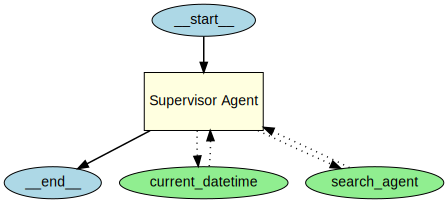

In [57]:
from agents.extensions.visualization import draw_graph

draw_graph(supervisor_agent)

## Hands-off

In [58]:
from tavily import TavilyClient
@function_tool
def browse_online(query):
  tavily_client = TavilyClient(api_key=userdata.get("TAVILY_API_KEY"))
  response = tavily_client.search(query)
  return response

search_agent = Agent(
    name = "Search Agent",
    instructions=search_agent_instructions,
    tools=[browse_online],
    model=model,
    handoff_description = "Specialized in Seacrhing and Browsing"
)

In [60]:
triage_agent=Agent(
    name = "Triage Agent",
    instructions=supervisor_agent_instructions,
    tools=[],
    handoffs=[search_agent],
    model=model,
)

In [61]:
response = Runner.run_sync(triage_agent,"What is weather in Lahore Today")
print(f"**{response.last_agent.name}**\n {response.final_output}")

**Search Agent**
 The weather in Lahore today, May 4, 2025, is partly cloudy with a temperature of 32.3°C (90.1°F). The wind is from the ENE at 7.2 kph. The humidity is 43%.


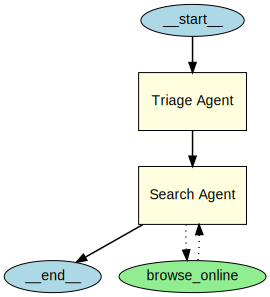

In [62]:
draw_graph(triage_agent)